# Breast Cancer Prediction

## Problem Statement

- Predicting if the cancer diagnosis is Benign or Malignant based on several observations/features 
- 30 features are used, examples:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

- Datasets are linearly separable using all 30 input features
- Number of Instances: 569
- Class Distribution: 212 Malignant, 357 Benign
- Target class:
         - Malignant
         - Benign


## Step 1: Import the Libraries and Dataset

In [2]:
# Import Libraries
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np  # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
%matplotlib inline

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_cancer = pd.read_csv('breast_cancer.csv')

In [7]:
df_cancer.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [12]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
Unnamed: 0                 569 non-null int64
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 no

## Step 2: Visualise the Data

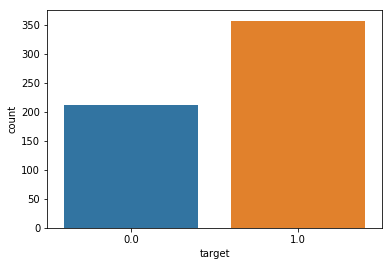

In [13]:
# Obtain Count plot
sns.countplot(df_cancer['target'],label='Count')

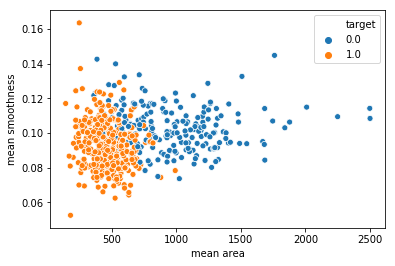

In [14]:
# Obtain Scatter plot
sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=df_cancer)

/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


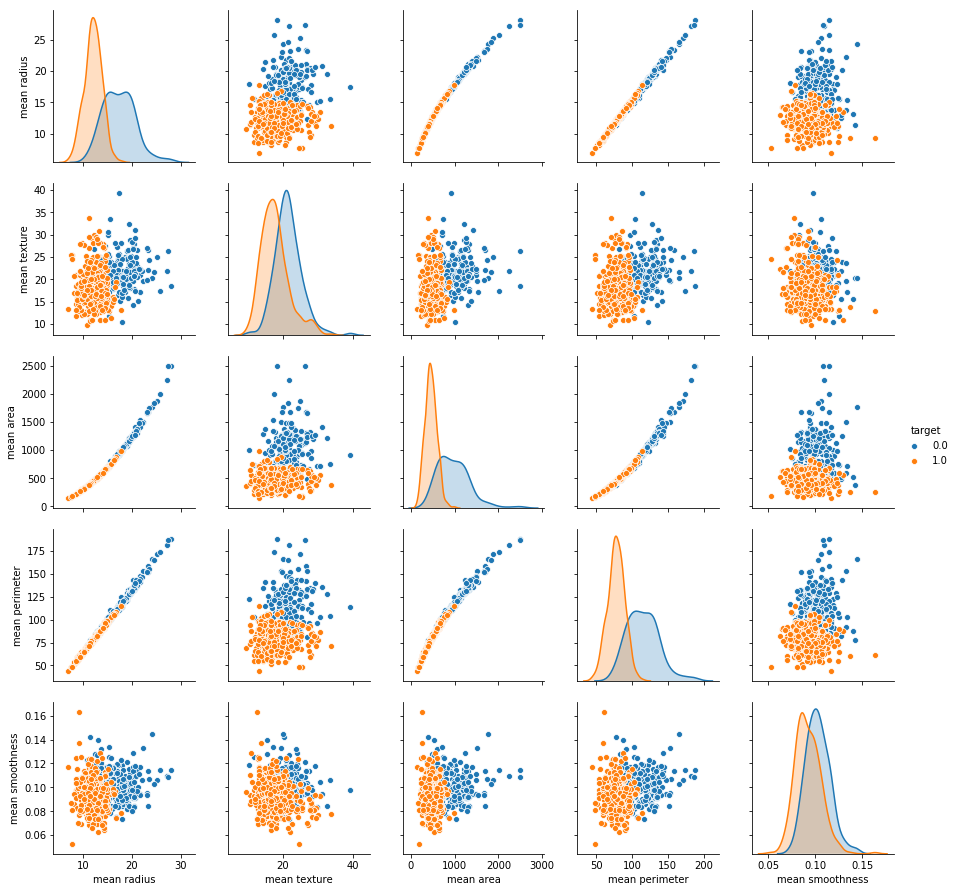

In [15]:
# Obtain Pair plot
sns.pairplot(df_cancer, hue='target', vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])


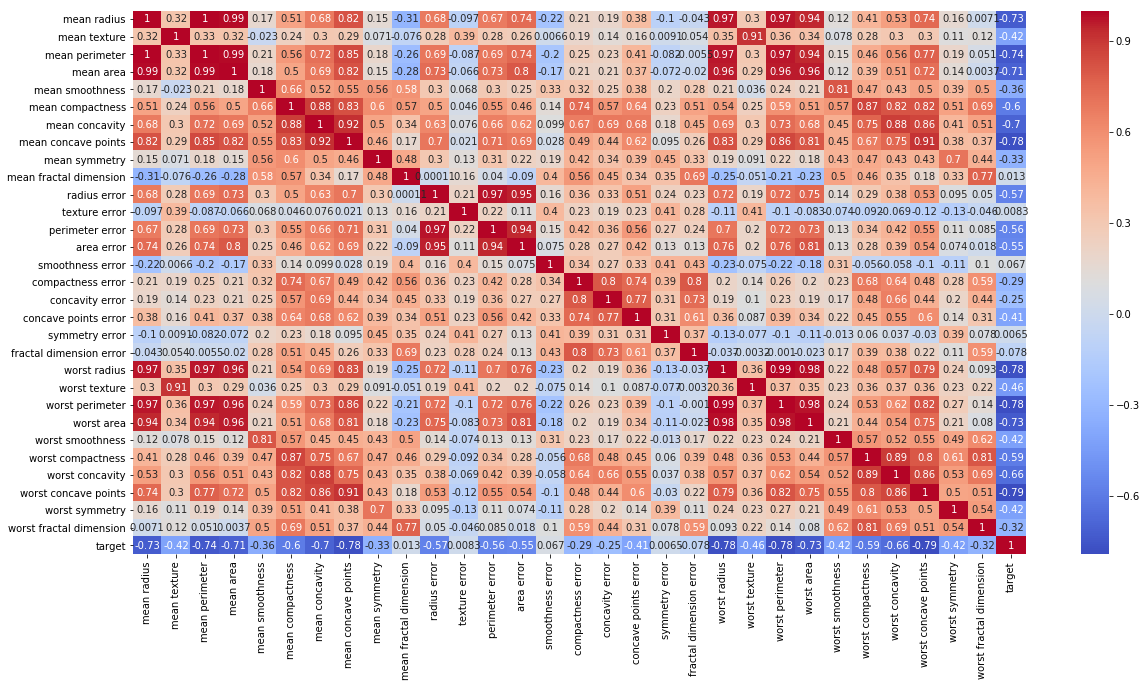

In [17]:
# Obtain Heatmap
plt.figure(figsize=(20,10)) 
sns.heatmap(df_cancer.corr(), annot=True, cmap='coolwarm') 

## Step 3: Train the Model

In [4]:
X = df_cancer.drop(['target'],axis=1)

In [5]:
y = df_cancer['target']

In [20]:
# Split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [55]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Step 4: Evaluate the Model

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

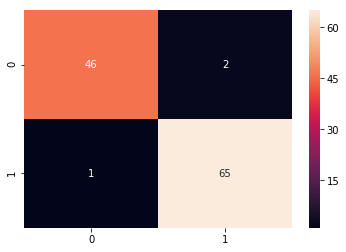

In [57]:
sns.heatmap(cm, annot=True)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        48
         1.0       0.97      0.98      0.98        66

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



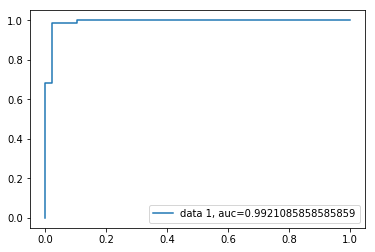

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = lr_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Step 5: Improve the Model I

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)


In [61]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler = Normalizer().fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [72]:
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)

/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


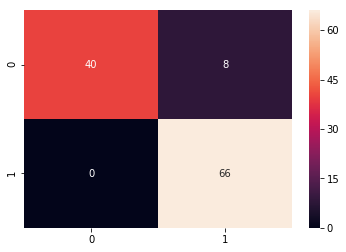

In [73]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        48
         1.0       0.89      1.00      0.94        66

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



## Step 6: Improve the Model II

In [44]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for optimal performance; any other input format will be conver

In [45]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [46]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, refit = True, verbose = 4)

In [49]:
grid.fit(X_train_scaled, y_train);

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.645, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.651, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.656, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.842, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.796, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.788, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............

/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2061: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0

In [48]:
grid.best_params_

{'C': 100}

In [50]:
grid_predictions = grid.predict(X_test_scaled)

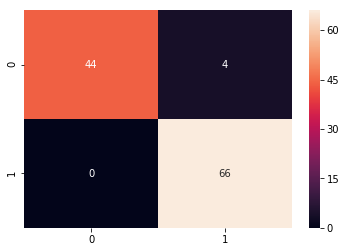

In [51]:
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)

In [52]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



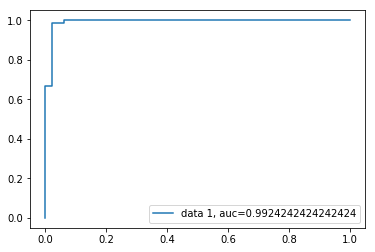

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = grid.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Step 7. Cross validation

In [6]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 96.839% (1.310%)


/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/py

## Step 8. Compare models

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print( ' {}: {} ({}) '.format(name, cv_results.mean(), cv_results.std()))

/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alabarga/NavarraBiomed/tesis/.tesis-env/lib/py

 LR: 0.9683897243107769 (0.01309542546423736) 
 LDA: 0.963063909774436 (0.024181912584889036) 
